#Dataset load

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns

In [ ]:
df=pd.read_csv('diabetes.csv')

In [ ]:
df.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

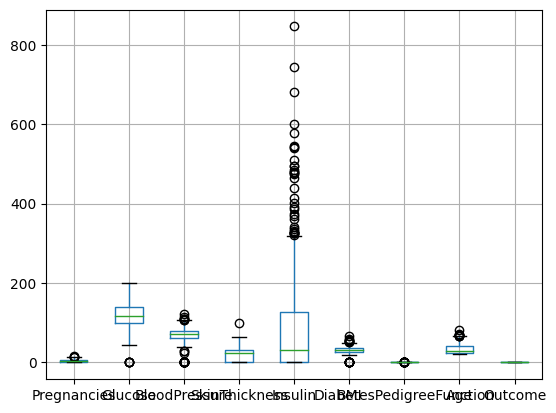

In [ ]:
df.boxplot()

<Axes: >

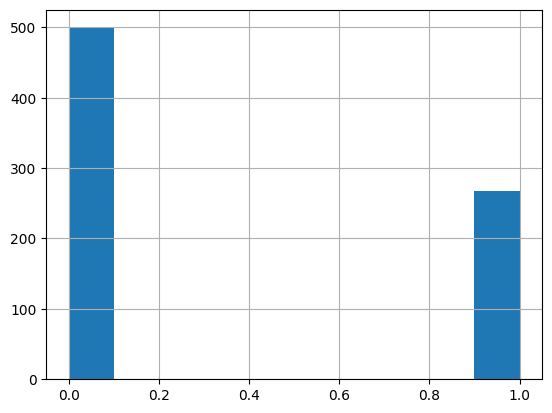

In [ ]:
df.Outcome.hist()

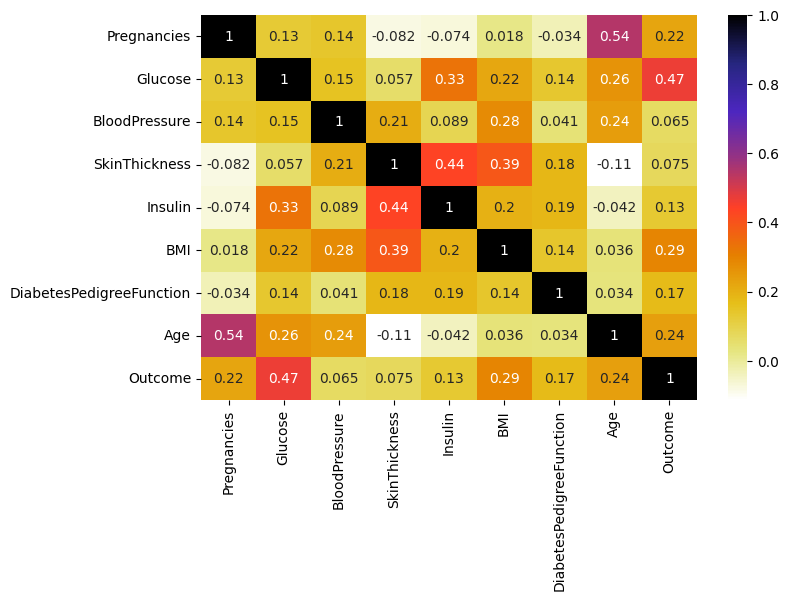

In [ ]:
cor = df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

#Data preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
df.shape

(768, 9)

In [ ]:
X=df.iloc[:,:8].values

In [ ]:
X.shape

(768, 8)

In [ ]:
y=df.iloc[:,8].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1,stratify=y,shuffle=True)

In [ ]:
scaler_X=StandardScaler()
#scaler_X=MinMaxScaler()
X_train=scaler_X.fit_transform(X_train)
X_test=scaler_X.transform(X_test)


In [ ]:
y_train

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

#SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid_linear = {'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
                     'kernel': ['linear']}

param_grid_rbf = {'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
                  'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  'kernel': ['rbf']}

# Combine the parameter grids
param_grid = [param_grid_linear, param_grid_rbf]

In [ ]:

# Create GridSearchCV with the combined parameter grid
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 88 candidates, totalling 440 fits
[CV 1/5] END ............C=1e-05, kernel=linear;, score=0.647 total time=   0.0s
[CV 2/5] END ............C=1e-05, kernel=linear;, score=0.652 total time=   0.0s
[CV 3/5] END ............C=1e-05, kernel=linear;, score=0.652 total time=   0.0s
[CV 4/5] END ............C=1e-05, kernel=linear;, score=0.652 total time=   0.0s
[CV 5/5] END ............C=1e-05, kernel=linear;, score=0.652 total time=   0.0s
[CV 1/5] END ...........C=0.0001, kernel=linear;, score=0.647 total time=   0.0s
[CV 2/5] END ...........C=0.0001, kernel=linear;, score=0.652 total time=   0.0s
[CV 3/5] END ...........C=0.0001, kernel=linear;, score=0.652 total time=   0.0s
[CV 4/5] END ...........C=0.0001, kernel=linear;, score=0.652 total time=   0.0s
[CV 5/5] END ...........C=0.0001, kernel=linear;, score=0.652 total time=   0.0s
[CV 1/5] END ............C=0.001, kernel=linear;, score=0.647 total time=   0.0s
[CV 2/5] END ............C=0.001, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                1000, 10000, 100000],
                          'kernel': ['linear']},
                         {'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                1000, 10000, 100000],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['rbf']}],
             verbose=3)

In [ ]:
grid.best_score_

0.7881409295352324

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

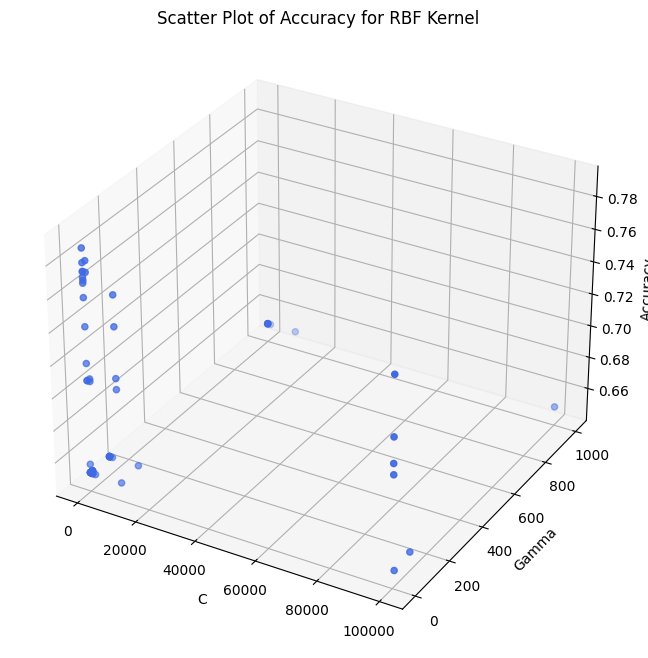

In [ ]:
results = grid.cv_results_

# Get the indices for the RBF kernel results
rbf_indices = np.where(results['param_kernel'] == 'rbf')[0]

# Extract C and gamma values for the RBF kernel
C_values = results['param_C'][rbf_indices].astype(float)
gamma_values = results['param_gamma'][rbf_indices].astype(float)

# Extract accuracy for the RBF kernel
accuracies = results['mean_test_score'][rbf_indices].astype(float)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot individual points with a darker shade of blue
ax.scatter(C_values, gamma_values, accuracies, c='royalblue', marker='o')

# Set labels and title
ax.set_xlabel('C')
ax.set_ylabel('Gamma')
ax.set_zlabel('Accuracy')
ax.set_title('Scatter Plot of Accuracy for RBF Kernel')

# Show the plot
plt.show()

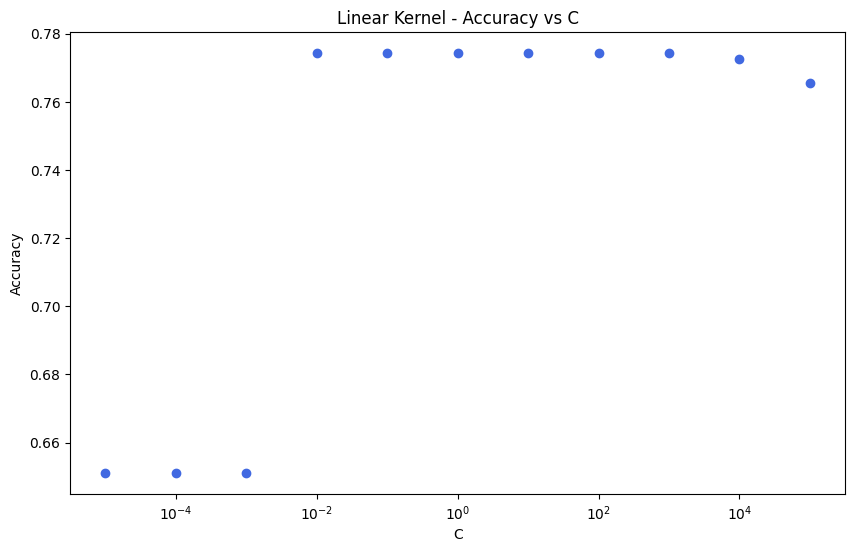

In [ ]:
results = grid.cv_results_

# Get the indices for the linear kernel results
linear_indices = np.where(results['param_kernel'] == 'linear')[0]

# Extract C values for the linear kernel
C_linear = results['param_C'][linear_indices].astype(float)
# Extract accuracy for the linear kernel
accuracies_linear = results['mean_test_score'][linear_indices].astype(float)

# Create a 2D plot for the linear kernel
plt.figure(figsize=(10, 6))
plt.scatter(C_linear, accuracies_linear, c='royalblue', marker='o')
plt.xscale('log')  # Set x-axis to a logarithmic scale if needed
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Linear Kernel - Accuracy vs C')
plt.show()

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(metrics.confusion_matrix(y_train, grid.predict(X_train)))
print(metrics.classification_report(y_train, grid.predict(X_train),target_names=['no', 'yes']))

[[348  27]
 [ 66 135]]
              precision    recall  f1-score   support

          no       0.84      0.93      0.88       375
         yes       0.83      0.67      0.74       201

    accuracy                           0.84       576
   macro avg       0.84      0.80      0.81       576
weighted avg       0.84      0.84      0.83       576



In [ ]:
print(metrics.confusion_matrix(y_test, grid_predictions))
print(metrics.classification_report(y_test, grid_predictions,target_names=['no', 'yes']))

[[109  16]
 [ 38  29]]
              precision    recall  f1-score   support

          no       0.74      0.87      0.80       125
         yes       0.64      0.43      0.52        67

    accuracy                           0.72       192
   macro avg       0.69      0.65      0.66       192
weighted avg       0.71      0.72      0.70       192



In [ ]:
accuracy_score(y_test,grid.predict(X_test))

0.71875

In [ ]:
montelo=SVC(C=40799.86798627175,gamma=0.16643372767458361,kernel='linear') #parameters found through smac(bayesian optimization) in a different notebook due to dependencies

In [ ]:
montelo.fit(X_train,y_train)

SVC(C=40799.86798627175, gamma=0.16643372767458361, kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,montelo.predict(X_train))

0.7760416666666666

In [ ]:
accuracy_score(y_test,montelo.predict(X_test))

0.7760416666666666

In [ ]:
print(metrics.confusion_matrix(y_train, montelo.predict(X_train)))
print(metrics.classification_report(y_train, montelo.predict(X_train),target_names=['no', 'yes']))

[[329  46]
 [ 83 118]]
              precision    recall  f1-score   support

          no       0.80      0.88      0.84       375
         yes       0.72      0.59      0.65       201

    accuracy                           0.78       576
   macro avg       0.76      0.73      0.74       576
weighted avg       0.77      0.78      0.77       576



In [ ]:
print(metrics.confusion_matrix(y_test, montelo.predict(X_test)))
print(metrics.classification_report(y_test, montelo.predict(X_test),target_names=['no', 'yes']))

[[113  12]
 [ 31  36]]
              precision    recall  f1-score   support

          no       0.78      0.90      0.84       125
         yes       0.75      0.54      0.63        67

    accuracy                           0.78       192
   macro avg       0.77      0.72      0.73       192
weighted avg       0.77      0.78      0.77       192



#SVM with PCA (ignore this section)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import plotly.express as px



In [ ]:
pca=PCA()
X_pca = pca.fit_transform(StandardScaler().fit_transform(X))
pca.explained_variance_  #Kaiser's critirion says we should keep the components with variance>1


array([2.09711056, 1.73346726, 1.03097228, 0.87667054, 0.76333832,
       0.68351839, 0.42036353, 0.40498938])

In [ ]:
X_pca.shape

(768, 8)

In [ ]:
y.reshape((768,1)).shape

(768, 1)

In [ ]:
np.concatenate([X_pca,y.reshape((768,1))],axis=1)

array([[ 1.06850273,  1.23489499,  0.09592984, ...,  0.85882133,
         0.97430355,  1.        ],
       [-1.12168331, -0.73385167, -0.71293816, ...,  0.75703403,
         0.35421454,  0.        ],
       [-0.39647671,  1.59587594,  1.76067844, ..., -1.15299029,
         1.06852795,  1.        ],
       ...,
       [-0.28347525,  0.09706503, -0.07719194, ..., -0.33556321,
         0.2894389 ,  0.        ],
       [-1.06032431,  0.83706234,  0.42503045, ...,  1.18030813,
        -0.53434386,  1.        ],
       [-0.83989172, -1.15175485, -1.00917817, ...,  0.24523536,
         0.51594622,  0.        ]])

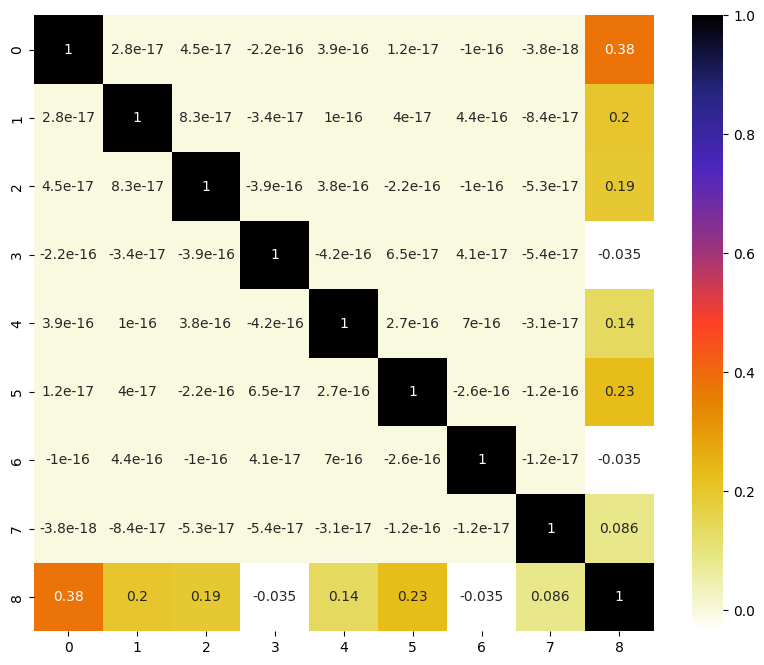

In [ ]:
cor = pd.DataFrame(np.concatenate([X_pca,y.reshape((768,1))],axis=1)).corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

In [ ]:
#we will keep the components that have corellation with y greater than 0.1

In [ ]:
#in general we should pca differently in test and train but we will skip this issue for now

In [ ]:
X_pca=X_pca[:,[0,1,2,4,5,7]]

In [ ]:
X_pca.shape

(768, 6)

In [ ]:
df_plotly = pd.DataFrame({'PC1': X_pca[:, 0], 'PC2': X_pca[:, 1], 'PC3': X_pca[:, 2], 'Category': y})

# Create a color map for the categories
color_map = {'Category 0': 'red', 'Category 1': 'blue'}

# Create 3D scatter plot
fig = px.scatter_3d(
    df_plotly, x='PC1', y='PC2', z='PC3', color='Category',
    color_discrete_map=color_map,
    title='Interactive 3D Scatter Plot'
)

fig.show()

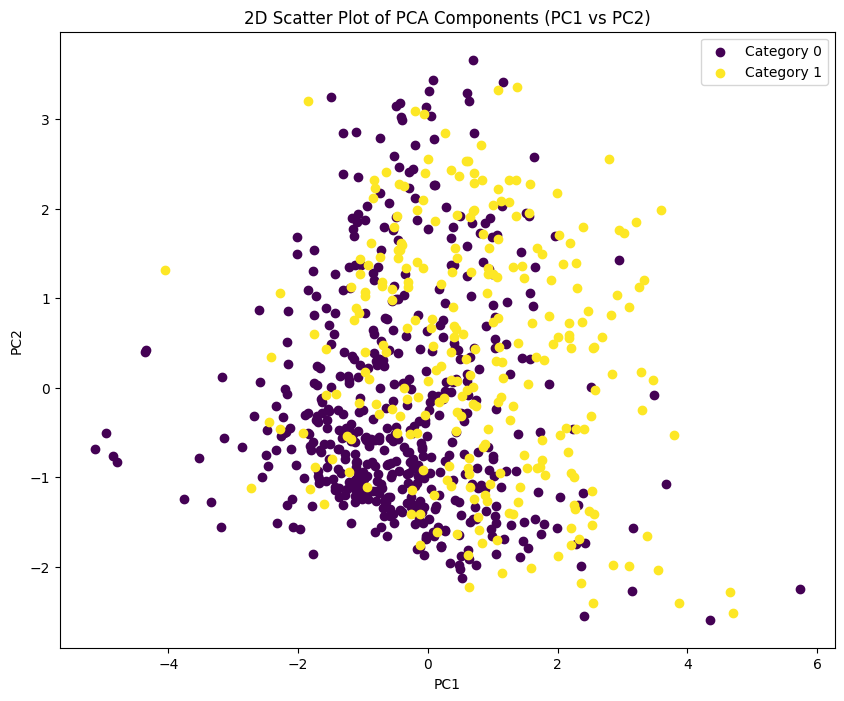

In [ ]:
categories = np.unique(y)
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

plt.figure(figsize=(10, 8))

for category, color in zip(categories, colors):
    subset = X_pca[y == category]
    plt.scatter(subset[:, 0], subset[:, 1], label=f'Category {category}', color=color)

# Set labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D Scatter Plot of PCA Components (PC1 vs PC2)')

# Add a legend
plt.legend()

# Show the plot
plt.show()

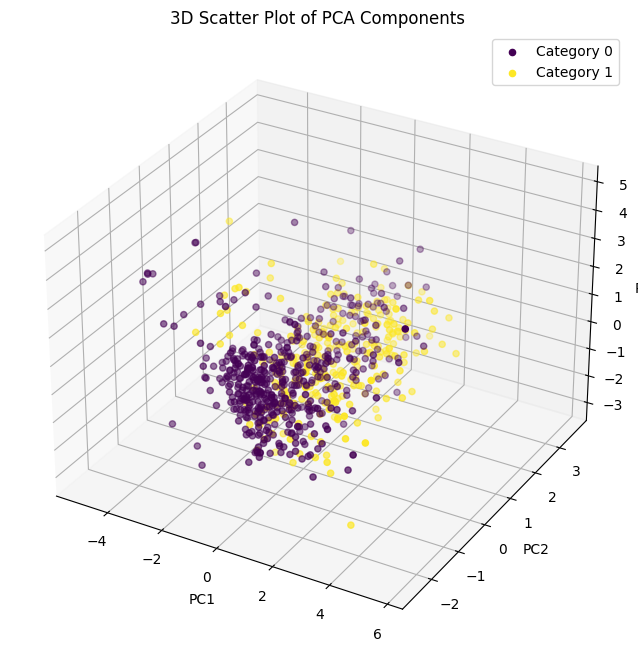

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


categories = np.unique(y)
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

for category, color in zip(categories, colors):
    subset = X_pca[y == category]
    ax.scatter(subset[:, 0], subset[:, 1], subset[:, 2], label=f'Category {category}', color=color)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot of PCA Components')
ax.legend()
plt.show()

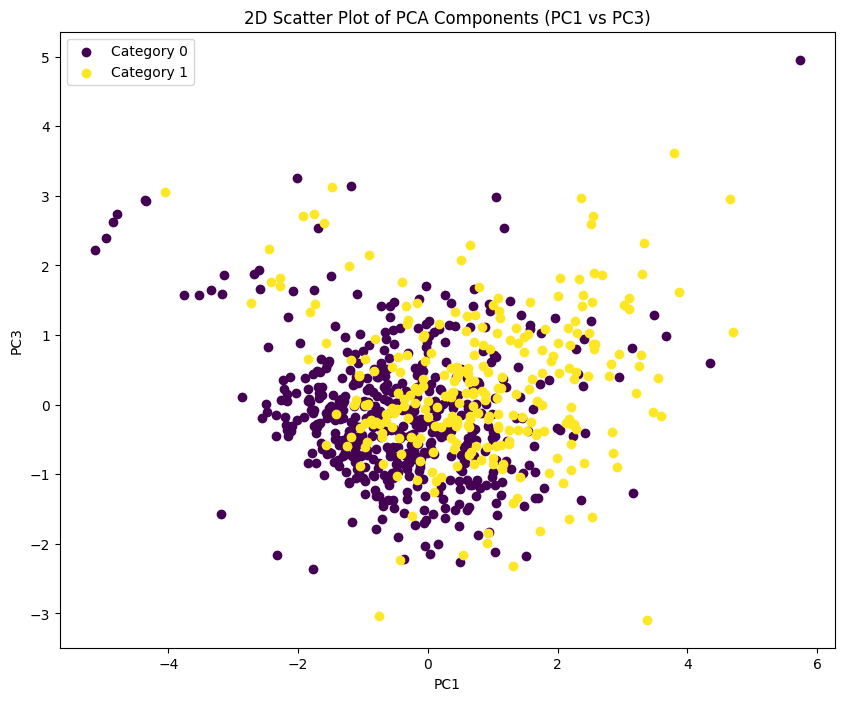

In [ ]:
categories = np.unique(y)
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

plt.figure(figsize=(10, 8))

for category, color in zip(categories, colors):
    subset = X_pca[y == category]
    plt.scatter(subset[:, 0], subset[:, 2], label=f'Category {category}', color=color)

# Set labels and title
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('2D Scatter Plot of PCA Components (PC1 vs PC3)')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
#grid_pca = GridSearchCV(SVC(), param_grid, refit = True, cv=5  ,verbose=3)

In [ ]:
#X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.25,random_state=42,stratify=y,shuffle=True)

In [ ]:
#grid_pca.fit(X_train, y_train)

In [ ]:
# print best parameter after tuning
#print(grid_pca.best_params_)

In [ ]:
#pca_svc=SVC(C=100,gamma=0.01,kernel='rbf')

In [ ]:
#pca_svc.fit(X_train,y_train)

In [ ]:
#accuracy_score(y_train,pca_svc.predict(X_train))

In [ ]:
#accuracy_score(y_test,pca_svc.predict(X_test))

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

In [ ]:
Cs = [0.000001,0.00001,0.0001,0.001, 0.01, 0.1, 1, 10, 100,1000,10000]

In [ ]:
log_reg1=LogisticRegressionCV(Cs=Cs, cv=5, scoring='accuracy',refit=True)

In [ ]:
log_reg1.fit(X_train,y_train)

LogisticRegressionCV(Cs=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                         1000, 10000],
                     cv=5, scoring='accuracy')

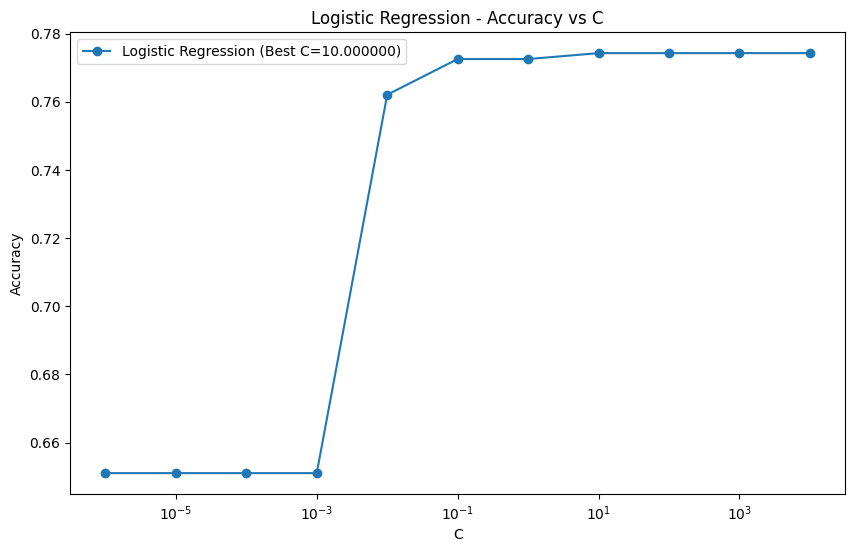

In [ ]:
C_values = log_reg1.Cs_
scores = np.mean(log_reg1.scores_[1], axis=0)  # Use scores_[1] for binary classification, adjust as needed

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(C_values, scores, marker='o', linestyle='-', label='Logistic Regression')
plt.xscale('log')  # Set x-axis to a logarithmic scale
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Logistic Regression - Accuracy vs C')

# Add legend with best C value
best_C_index = np.argmax(scores)
best_C = C_values[best_C_index]
plt.legend([f'Logistic Regression (Best C={best_C:.6f})'])

plt.show()

In [ ]:
log_reg1.C_ #best C

array([10.])

In [ ]:
y_pred_train=log_reg1.predict(X_train)
y_pred_test=log_reg1.predict(X_test)

In [ ]:
accuracy_score(y_train,y_pred_train)

0.7829861111111112

In [ ]:
accuracy_score(y_test,y_pred_test)

0.7760416666666666

In [ ]:
print(metrics.confusion_matrix(y_train ,y_pred_train))
print(metrics.classification_report(y_train, y_pred_train,target_names=['no', 'yes']))

[[329  46]
 [ 79 122]]
              precision    recall  f1-score   support

          no       0.81      0.88      0.84       375
         yes       0.73      0.61      0.66       201

    accuracy                           0.78       576
   macro avg       0.77      0.74      0.75       576
weighted avg       0.78      0.78      0.78       576



In [ ]:
print(metrics.confusion_matrix(y_test ,y_pred_test))
print(metrics.classification_report(y_test, y_pred_test,target_names=['no', 'yes']))

[[113  12]
 [ 31  36]]
              precision    recall  f1-score   support

          no       0.78      0.90      0.84       125
         yes       0.75      0.54      0.63        67

    accuracy                           0.78       192
   macro avg       0.77      0.72      0.73       192
weighted avg       0.77      0.78      0.77       192



#Feature Selection

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV


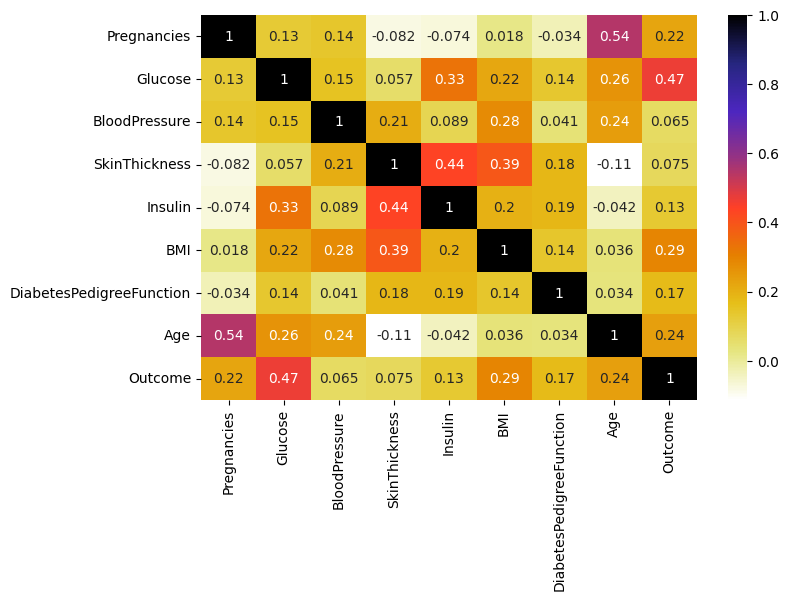

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()
#the features with the two highest(absolute) corellations with the dependent variable are Glucose and BMI therefore we will repeat our search with only these 2 features

In [ ]:
X_train=X_train[:,[1,5]]
X_test=X_test[:,[1,5]]

In [ ]:
X_train.shape

(576, 2)

In [ ]:
grid2 = GridSearchCV(SVC(), param_grid, refit = True, cv=5  ,verbose=3)

In [ ]:
grid2.fit(X_train, y_train)

Fitting 5 folds for each of 88 candidates, totalling 440 fits
[CV 1/5] END ............C=1e-05, kernel=linear;, score=0.647 total time=   0.0s
[CV 2/5] END ............C=1e-05, kernel=linear;, score=0.652 total time=   0.0s
[CV 3/5] END ............C=1e-05, kernel=linear;, score=0.652 total time=   0.0s
[CV 4/5] END ............C=1e-05, kernel=linear;, score=0.652 total time=   0.0s
[CV 5/5] END ............C=1e-05, kernel=linear;, score=0.652 total time=   0.0s
[CV 1/5] END ...........C=0.0001, kernel=linear;, score=0.647 total time=   0.0s
[CV 2/5] END ...........C=0.0001, kernel=linear;, score=0.652 total time=   0.0s
[CV 3/5] END ...........C=0.0001, kernel=linear;, score=0.652 total time=   0.0s
[CV 4/5] END ...........C=0.0001, kernel=linear;, score=0.652 total time=   0.0s
[CV 5/5] END ...........C=0.0001, kernel=linear;, score=0.652 total time=   0.0s
[CV 1/5] END ............C=0.001, kernel=linear;, score=0.647 total time=   0.0s
[CV 2/5] END ............C=0.001, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                1000, 10000, 100000],
                          'kernel': ['linear']},
                         {'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                1000, 10000, 100000],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['rbf']}],
             verbose=3)

In [ ]:
print(grid2.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
# print classification report
print(metrics.confusion_matrix(y_train, grid2.best_estimator_.predict(X_train)))
print(metrics.classification_report(y_train, grid2.best_estimator_.predict(X_train),
  target_names=['no', 'yes']))

[[339  36]
 [ 96 105]]
              precision    recall  f1-score   support

          no       0.78      0.90      0.84       375
         yes       0.74      0.52      0.61       201

    accuracy                           0.77       576
   macro avg       0.76      0.71      0.73       576
weighted avg       0.77      0.77      0.76       576



In [ ]:
print(metrics.confusion_matrix(y_test, grid2.best_estimator_.predict(X_test)))
print(metrics.classification_report(y_test,  grid2.best_estimator_.predict(X_test),target_names=['no', 'yes']))

[[111  14]
 [ 37  30]]
              precision    recall  f1-score   support

          no       0.75      0.89      0.81       125
         yes       0.68      0.45      0.54        67

    accuracy                           0.73       192
   macro avg       0.72      0.67      0.68       192
weighted avg       0.73      0.73      0.72       192



In [ ]:
grid2.best_estimator_

SVC(C=100, gamma=0.001)

In [ ]:
accuracy_score(y_train,grid2.predict(X_train))

0.7708333333333334

In [ ]:
accuracy_score(y_test,grid2.predict(X_test))

0.734375

In [ ]:
#SVM plots

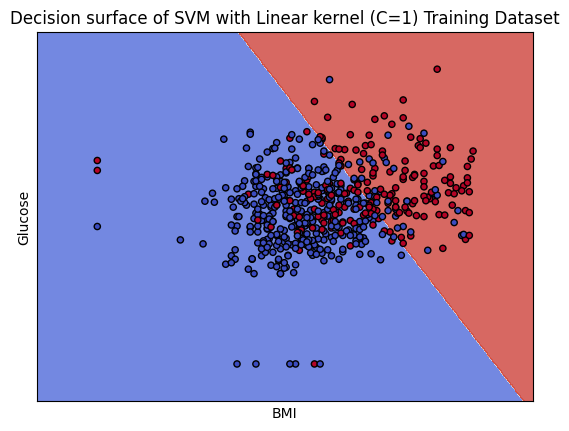

In [ ]:
best_svm_linear_c1 = SVC(C=1,kernel='linear').fit(X_train,y_train)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()

# Title for the plots
title = ('Decision surface of SVM with Linear kernel (C=1) Training Dataset')

# Set-up grid for plotting.
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, best_svm_linear_c1, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Glucose')
ax.set_xlabel('BMI')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
#ax.legend()

plt.show()

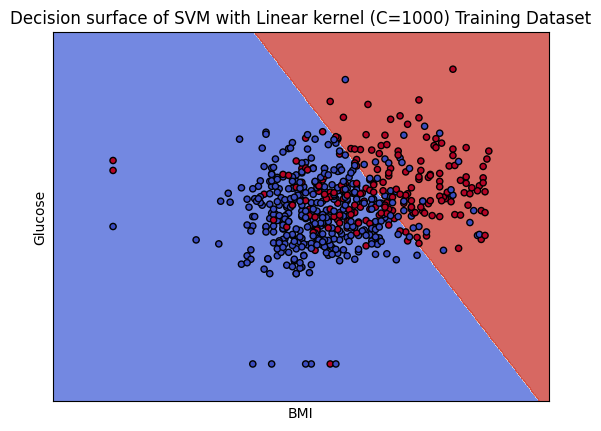

In [ ]:
best_svm_linear_c1000 = SVC(C=1000,kernel='linear').fit(X_train,y_train)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()

# Title for the plots
title = ('Decision surface of SVM with Linear kernel (C=1000) Training Dataset')

# Set-up grid for plotting.
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, best_svm_linear_c1000, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Glucose')
ax.set_xlabel('BMI')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
#ax.legend()

plt.show()

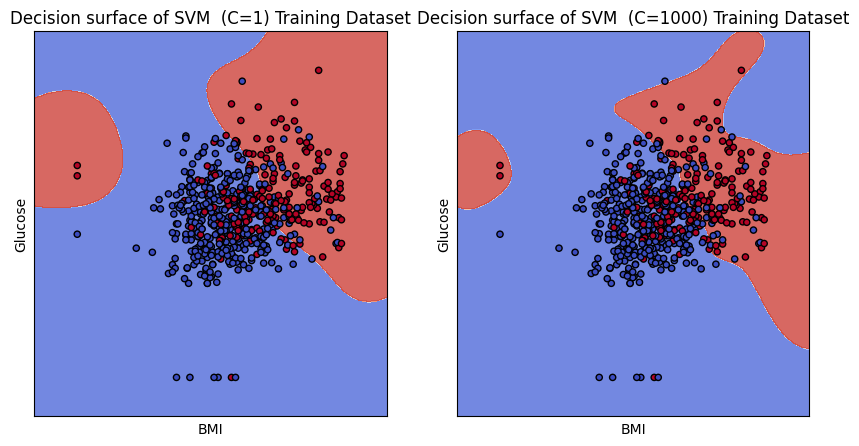

In [ ]:
best_svm_rbf_c1 = SVC(C=1, kernel='rbf').fit(X_train, y_train)

# Train the SVM with C=1000
best_svm_rbf_c1000 = SVC(C=1000, kernel='rbf').fit(X_train, y_train)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # Create a 1x2 subplot grid

# Title for the plots
title1 = 'Decision surface of SVM  (C=1) Training Dataset'
title2 = 'Decision surface of SVM  (C=1000) Training Dataset'

# Set-up grid for plotting.
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

# Plot for C=1
plot_contours(ax1, best_svm_rbf_c1, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax1.set_ylabel('Glucose')
ax1.set_xlabel('BMI')
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title(title1)

# Plot for C=1000
plot_contours(ax2, best_svm_rbf_c1000, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax2.set_ylabel('Glucose')
ax2.set_xlabel('BMI')
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title(title2)

plt.show()

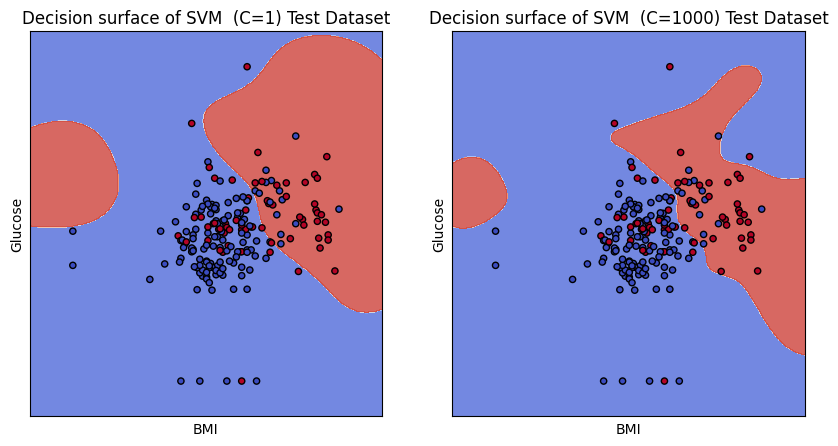

In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # Create a 1x2 subplot grid

# Title for the plots
title1 = 'Decision surface of SVM  (C=1) Test Dataset'
title2 = 'Decision surface of SVM  (C=1000) Test Dataset'

# Set-up grid for plotting.
X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

# Plot for C=1
plot_contours(ax1, best_svm_rbf_c1, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax1.set_ylabel('Glucose')
ax1.set_xlabel('BMI')
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title(title1)

# Plot for C=1000
plot_contours(ax2, best_svm_rbf_c1000, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax2.set_ylabel('Glucose')
ax2.set_xlabel('BMI')
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title(title2)

plt.show()

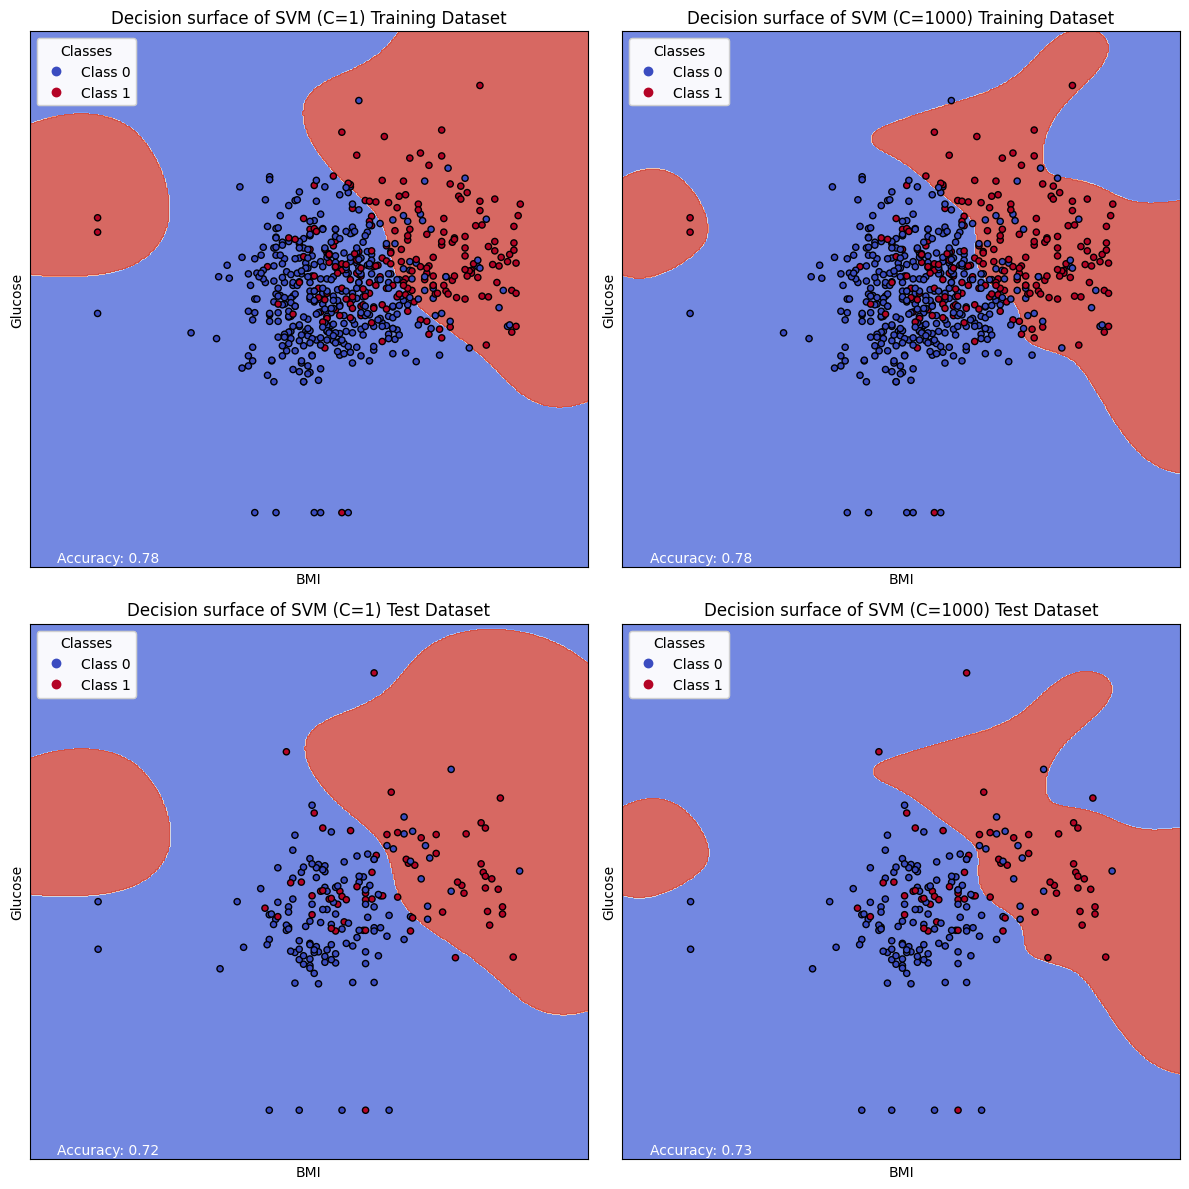

In [ ]:
# Train the SVM with C=1
best_svm_rbf_c1 = SVC(C=1, kernel='rbf').fit(X_train, y_train)

# Train the SVM with C=1000
best_svm_rbf_c1000 = SVC(C=1000, kernel='rbf').fit(X_train, y_train)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_with_accuracy(ax, clf, xx, yy, X, y, title):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel('Glucose')
    ax.set_xlabel('BMI')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

    # Add accuracy and color indicator
    y_pred = clf.predict(X)
    accuracy = accuracy_score(y, y_pred)
    legend_labels = [f'Class {i}' for i in np.unique(y)]
    legend = ax.legend(handles=scatter.legend_elements()[0], title="Classes", labels=legend_labels, loc='upper left')
    ax.add_artist(legend)
    ax.text(0.05, 0.01, f'Accuracy: {accuracy:.2f}', transform=ax.transAxes, horizontalalignment='left', color='white')

# Set-up grid for plotting.
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Title for the plots
titles = ['Decision surface of SVM (C=1) Training Dataset',
          'Decision surface of SVM (C=1000) Training Dataset',
          'Decision surface of SVM (C=1) Test Dataset',
          'Decision surface of SVM (C=1000) Test Dataset']

# Plot for C=1 on the training dataset
plot_with_accuracy(axs[0, 0], best_svm_rbf_c1, xx, yy, X_train, y_train, titles[0])

# Plot for C=1000 on the training dataset
plot_with_accuracy(axs[0, 1], best_svm_rbf_c1000, xx, yy, X_train, y_train, titles[1])

# Set-up grid for plotting on the test dataset.
X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

# Plot for C=1 on the test dataset
plot_with_accuracy(axs[1, 0], best_svm_rbf_c1, xx, yy, X_test, y_test, titles[2])

# Plot for C=1000 on the test dataset
plot_with_accuracy(axs[1, 1], best_svm_rbf_c1000, xx, yy, X_test, y_test, titles[3])

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

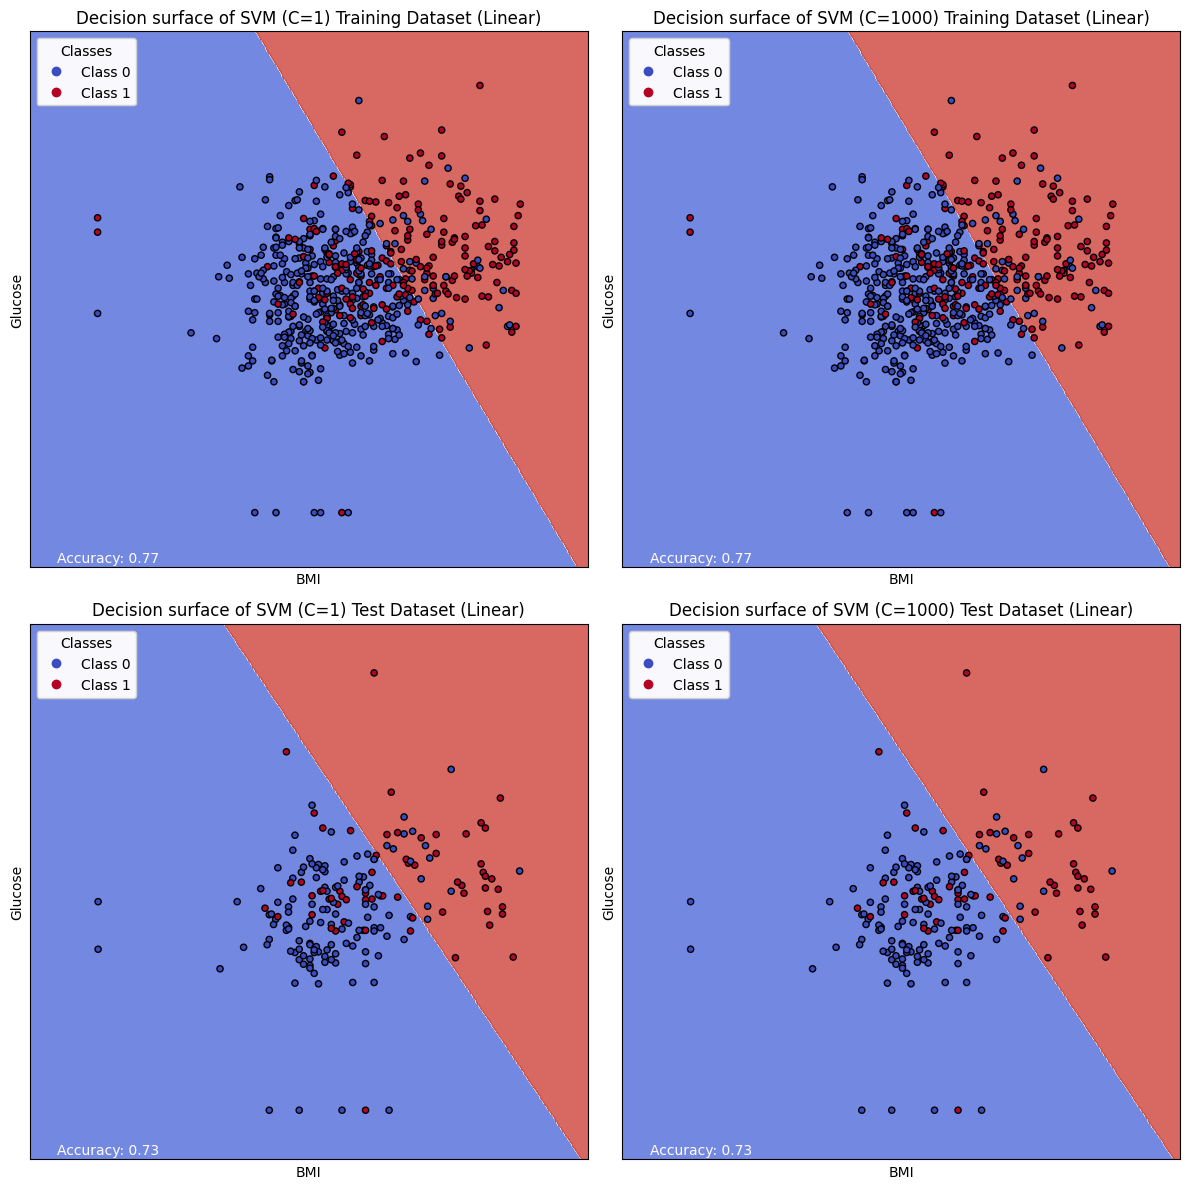

In [ ]:
# Train the SVM with C=1 and linear kernel
best_svm_linear_c1 = SVC(C=1, kernel='linear').fit(X_train, y_train)

# Train the SVM with C=1000 and linear kernel
best_svm_linear_c1000 = SVC(C=1000, kernel='linear').fit(X_train, y_train)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_with_accuracy(ax, clf, xx, yy, X, y, title):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel('Glucose')
    ax.set_xlabel('BMI')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

    # Add accuracy and color indicator
    y_pred = clf.predict(X)
    accuracy = accuracy_score(y, y_pred)
    legend_labels = [f'Class {i}' for i in np.unique(y)]
    legend = ax.legend(handles=scatter.legend_elements()[0], title="Classes", labels=legend_labels, loc='upper left')
    ax.add_artist(legend)
    ax.text(0.05, 0.01, f'Accuracy: {accuracy:.2f}', transform=ax.transAxes, horizontalalignment='left', color='white')

# Set-up grid for plotting.
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Title for the plots
titles = ['Decision surface of SVM (C=1) Training Dataset (Linear)',
          'Decision surface of SVM (C=1000) Training Dataset (Linear)',
          'Decision surface of SVM (C=1) Test Dataset (Linear)',
          'Decision surface of SVM (C=1000) Test Dataset (Linear)']

# Plot for C=1 on the training dataset
plot_with_accuracy(axs[0, 0], best_svm_linear_c1, xx, yy, X_train, y_train, titles[0])

# Plot for C=1000 on the training dataset
plot_with_accuracy(axs[0, 1], best_svm_linear_c1000, xx, yy, X_train, y_train, titles[1])

# Set-up grid for plotting on the test dataset.
X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

# Plot for C=1 on the test dataset
plot_with_accuracy(axs[1, 0], best_svm_linear_c1, xx, yy, X_test, y_test, titles[2])

# Plot for C=1000 on the test dataset
plot_with_accuracy(axs[1, 1], best_svm_linear_c1000, xx, yy, X_test, y_test, titles[3])

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

In [ ]:
###Logistic Regression plots

In [ ]:
Cs = [0.000001,0.00001,0.0001,0.001, 0.01, 0.1, 1, 10, 100,1000,100000]

In [ ]:
log_reg2=LogisticRegressionCV(Cs=Cs, cv=5, scoring='accuracy',refit=True)

In [ ]:
log_reg2.fit(X_train,y_train)

LogisticRegressionCV(Cs=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                         1000, 100000],
                     cv=5, scoring='accuracy')

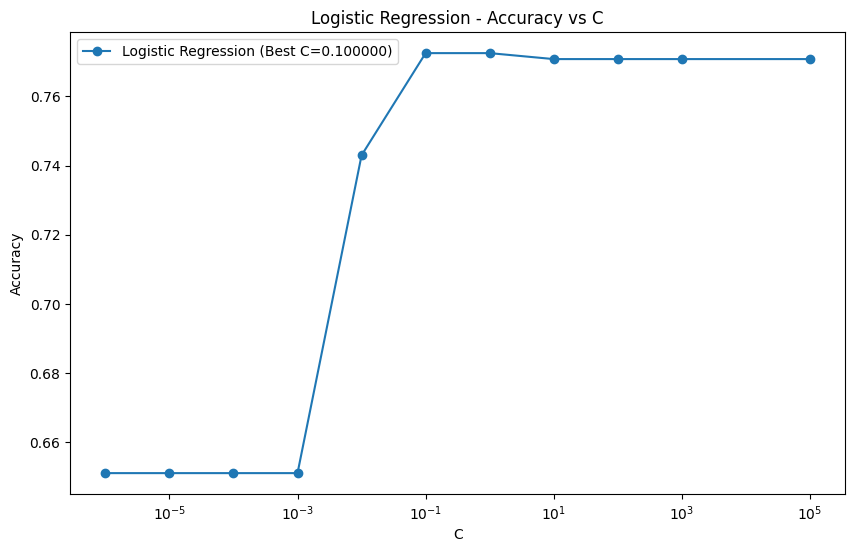

In [ ]:
C_values = log_reg2.Cs_
scores = np.mean(log_reg2.scores_[1], axis=0)  # Use scores_[1] for binary classification, adjust as needed

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(C_values, scores, marker='o', linestyle='-', label='Logistic Regression')
plt.xscale('log')  # Set x-axis to a logarithmic scale
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Logistic Regression - Accuracy vs C')

# Add legend with best C value
best_C_index = np.argmax(scores)
best_C = C_values[best_C_index]
plt.legend([f'Logistic Regression (Best C={best_C:.6f})'])

plt.show()

In [ ]:
y_pred_train=log_reg2.predict(X_train)
y_pred_test=log_reg2.predict(X_test)

In [ ]:
print(metrics.confusion_matrix(y_train, log_reg2.predict(X_train)))
print(metrics.classification_report(y_train, log_reg2.predict(X_train),
  target_names=['no', 'yes']))

[[337  38]
 [ 95 106]]
              precision    recall  f1-score   support

          no       0.78      0.90      0.84       375
         yes       0.74      0.53      0.61       201

    accuracy                           0.77       576
   macro avg       0.76      0.71      0.72       576
weighted avg       0.76      0.77      0.76       576



In [ ]:
print(metrics.confusion_matrix(y_test, log_reg2.predict(X_test)))
print(metrics.classification_report(y_test, log_reg2.predict(X_test),
  target_names=['no', 'yes']))

[[111  14]
 [ 37  30]]
              precision    recall  f1-score   support

          no       0.75      0.89      0.81       125
         yes       0.68      0.45      0.54        67

    accuracy                           0.73       192
   macro avg       0.72      0.67      0.68       192
weighted avg       0.73      0.73      0.72       192



In [ ]:
accuracy_score(y_train,y_pred_train)

0.7690972222222222

In [ ]:
accuracy_score(y_test,y_pred_test)

0.734375

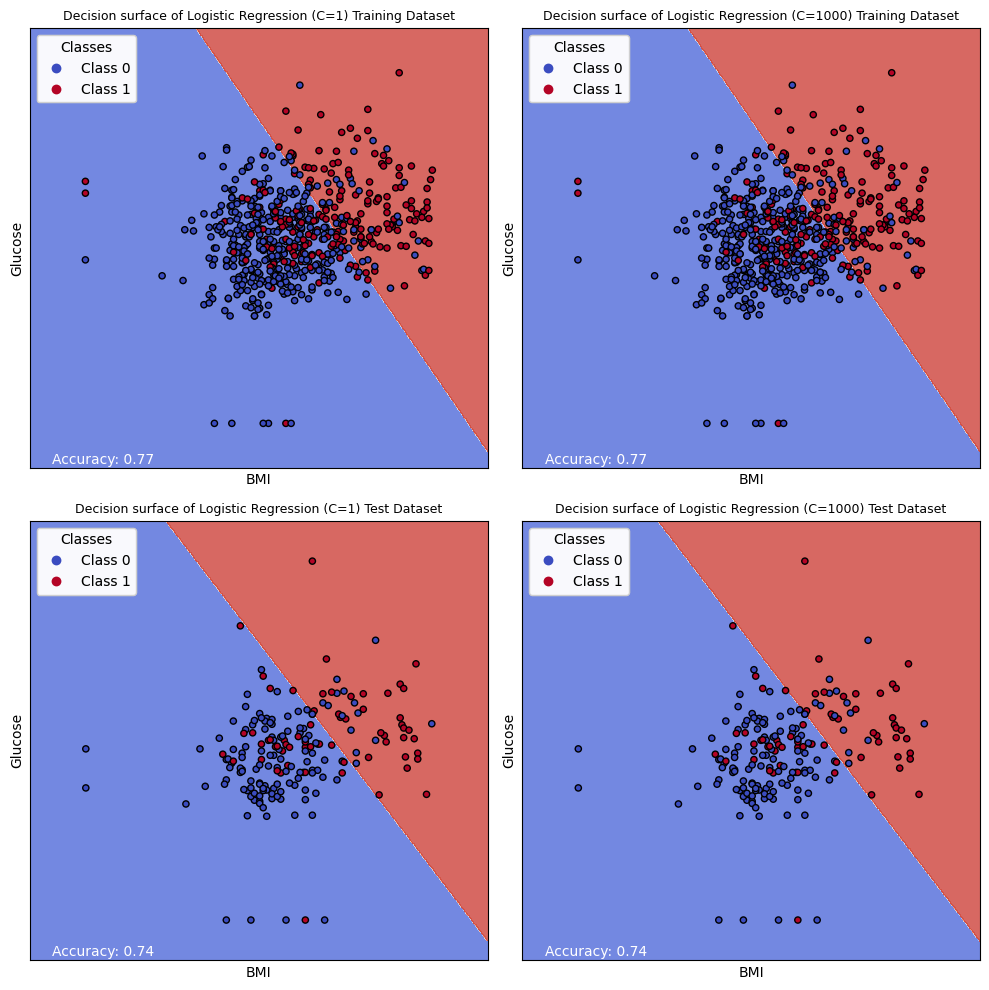

In [ ]:
# Train the Logistic Regression with C=1
best_log_reg_c1 = LogisticRegression(C=1).fit(X_train, y_train)

# Train the Logistic Regression with C=1000
best_log_reg_c1000 = LogisticRegression(C=1000).fit(X_train, y_train)

def plot_with_accuracy(ax, clf, X, y, title):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlabel('BMI')
    ax.set_ylabel('Glucose')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title, fontsize=9)  # Adjust the fontsize here

    # Add accuracy and color indicator
    y_pred = clf.predict(X)
    accuracy = accuracy_score(y, y_pred)
    legend_labels = [f'Class {i}' for i in np.unique(y)]
    legend = ax.legend(handles=scatter.legend_elements()[0], title="Classes", labels=legend_labels, loc='upper left')
    ax.add_artist(legend)
    ax.text(0.05, 0.01, f'Accuracy: {accuracy:.2f}', transform=ax.transAxes, horizontalalignment='left', color='white')

# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Title for the plots
titles = ['Decision surface of Logistic Regression (C=1) Training Dataset',
          'Decision surface of Logistic Regression (C=1000) Training Dataset',
          'Decision surface of Logistic Regression (C=1) Test Dataset',
          'Decision surface of Logistic Regression (C=1000) Test Dataset']

# Plot for C=1 on the training dataset
plot_with_accuracy(axs[0, 0], best_log_reg_c1, X_train, y_train, titles[0])

# Plot for C=1000 on the training dataset
plot_with_accuracy(axs[0, 1], best_log_reg_c1000, X_train, y_train, titles[1])

# Set-up grid for plotting on the test dataset.
X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

# Plot for C=1 on the test dataset
plot_with_accuracy(axs[1, 0], best_log_reg_c1, X_test, y_test, titles[2])

# Plot for C=1000 on the test dataset
plot_with_accuracy(axs[1, 1], best_log_reg_c1000, X_test, y_test, titles[3])

# Adjust layout for better spacing
plt.tight_layout()

plt.show()